now we group things by job titles 

percentage of one skill in a job

In [1]:
import pandas as pd
from datasets import load_dataset
import ast

import seaborn as sns
import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

job = ['Data Analyst']
country = ['United States']
##Data cleanup
#filter to US jobs
df_US = df[(df.job_country.isin(country)) & (df.job_title_short.isin(job))].copy()
#transition the str skills to list 
df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

df_explode = df_US.explode('job_skills')
#capitalize the name of the skills 
df_explode['job_skills']=df_explode['job_skills'].str.capitalize()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [2]:
#we want to do this so we can exploide in the next block of code
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


In [3]:

# Explode the job_skills column to have one skill per row
df_explodes = df.explode('job_skills')

# Group by job_title_short and job_skills
df_title = df_explodes.groupby(by=['job_skills', 'job_title_short']).agg(
    salary_avg=('salary_year_avg', 'median'),  # Count of job titles
    skill_count=('job_skills', 'count')      # Count of job skills
).reset_index()  # Optionally reset the index for a clean DataFrame


In [4]:
# Display the resulting DataFrame
df_title

,job_skills,job_title_short,salary_avg,skill_count
0,airflow,Business Analyst,89550.0,318
1,airflow,Cloud Engineer,136000.0,260
2,airflow,Data Analyst,111175.0,2002
3,airflow,Data Engineer,137280.0,25505
4,airflow,Data Scientist,157000.0,3915
...,...,...,...,...
2251,zoom,Machine Learning Engineer,89100.0,46
2252,zoom,Senior Data Analyst,150000.0,86
2253,zoom,Senior Data Engineer,165250.0,122
2254,zoom,Senior Data Scientist,180000.0,79


In [5]:
df_sql= df_title[df_title['job_skills'] == 'sql'].copy()


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_sql is your DataFrame
sql_avg = df_sql['salary_avg'].mean()

# Create a new column 'pay_avg' based on the condition
df_sql['pay_avg'] = np.where(df_sql['salary_avg'] < sql_avg, False, True)

# Sort the DataFrame by 'skill_count'
df_sql = df_sql.sort_values('skill_count', ascending=False)

In [ ]:
#ploting and formating

from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels
def y_format(x, pos):
    return f'${int(x/1000)}K'


# Create a subplot with 1 row and 2 columns
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(18, 7))


# Scatter plot on the first subplot using Seaborn
scatter_plot = sns.scatterplot(data=df_sql, x='salary_avg', y='skill_count', ax=ax1)

# Label the points with the names in 'job_title_short'
for i, txt in enumerate(df_sql['job_title_short']):
    ax1.annotate(txt, (df_sql['salary_avg'].iloc[i], df_sql['skill_count'].iloc[i]))

# Set a white background with white grid
sns.set_theme(style="ticks")

# Draw a horizontal line for the median salary
ax1.axvline(x=sql_avg, color='r', linestyle='--', label=f'Median Salary: {sql_avg:.2f}')

# Apply the custom y-axis formatter
ax1.xaxis.set_major_formatter(FuncFormatter(y_format))

# Customize labels and title
ax1.set_xlabel('Salary Average')
ax1.set_ylabel('Skill Count')
ax1.set_title('Salary Average vs Skill Count')

# Add legend for the median line
ax1.legend()

# Pie chart on the second subplot using Matplotlib (Seaborn doesn't have a pie chart function)
pay_avg_counts = df_sql['pay_avg'].value_counts()
job_titles = df_sql.groupby('pay_avg')['job_title_short'].apply(lambda x: '\n'.join(x)).values
ax2.pie(pay_avg_counts, labels=job_titles, autopct='%1.1f%%', startangle=90)
ax2.set_title('Which job is below average?')

# Create a custom legend handle
custom_legend_handles = [plt.Line2D([0], [0], color='purple', marker='s', markersize=10, label='Below Average', linestyle= 'None'),
                         plt.Line2D([0], [0], color='red', marker='s', markersize=10, label='Above Average', linestyle= 'None')]

# Add the custom legend to ax2
ax2.legend(handles=custom_legend_handles, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



###Deprecated

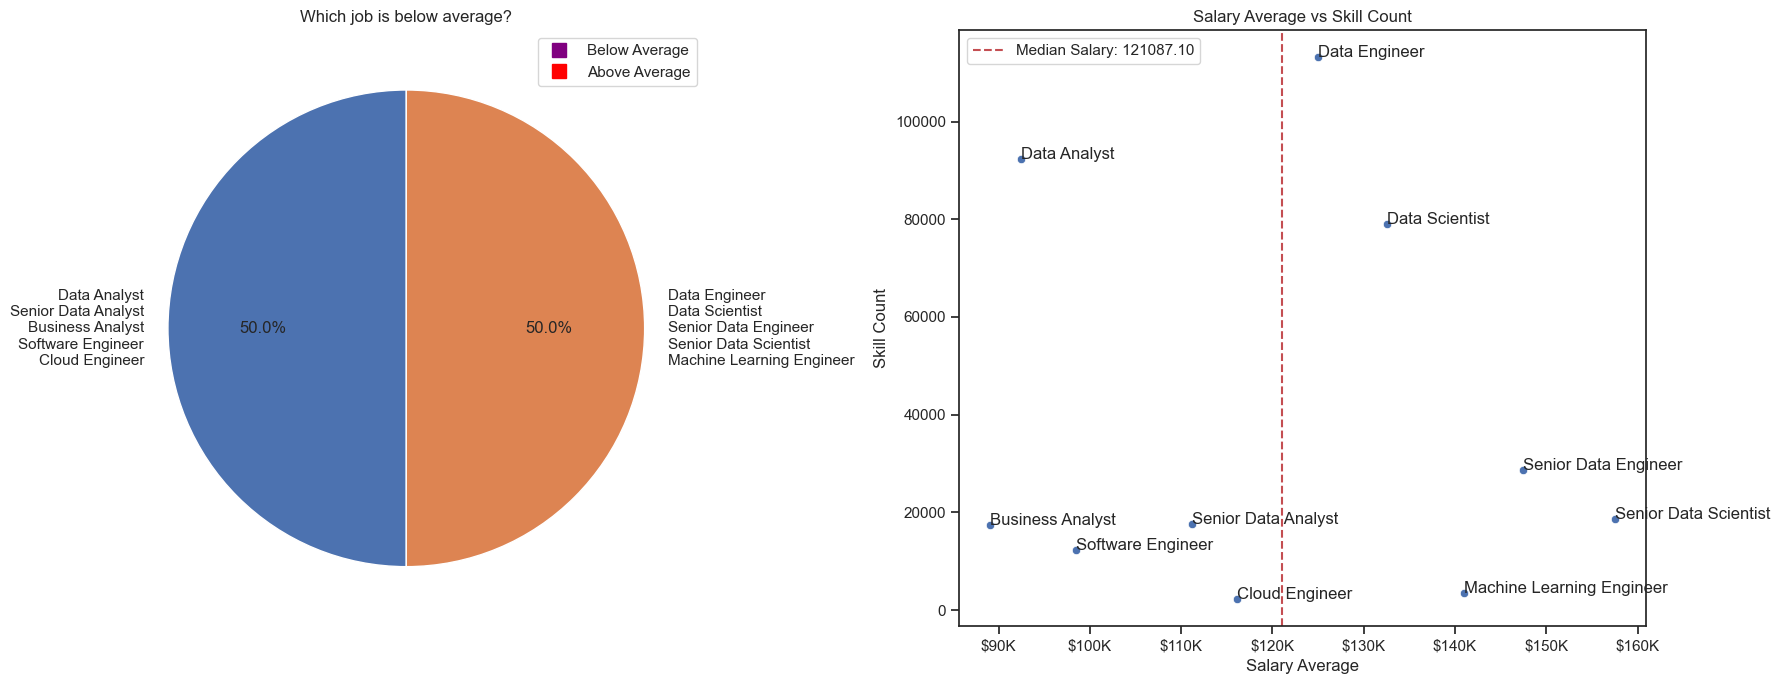

In [46]:
#ploting and formating

from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels
def y_format(x, pos):
    return f'${int(x/1000)}K'


# Create a subplot with 1 row and 2 columns
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(18, 7))


# Scatter plot on the first subplot using Seaborn
scatter_plot = sns.scatterplot(data=df_sql, x='salary_avg', y='skill_count', ax=ax1)

# Label the points with the names in 'job_title_short'
for i, txt in enumerate(df_sql['job_title_short']):
    ax1.annotate(txt, (df_sql['salary_avg'].iloc[i], df_sql['skill_count'].iloc[i]))

# Set a white background with white grid
sns.set_theme(style="ticks")

# Draw a horizontal line for the median salary
ax1.axvline(x=sql_avg, color='r', linestyle='--', label=f'Median Salary: {sql_avg:.2f}')

# Apply the custom y-axis formatter
ax1.xaxis.set_major_formatter(FuncFormatter(y_format))

# Customize labels and title
ax1.set_xlabel('Salary Average')
ax1.set_ylabel('Skill Count')
ax1.set_title('Salary Average vs Skill Count')

# Add legend for the median line
ax1.legend()

# Pie chart on the second subplot using Matplotlib (Seaborn doesn't have a pie chart function)
pay_avg_counts = df_sql['pay_avg'].value_counts()
job_titles = df_sql.groupby('pay_avg')['job_title_short'].apply(lambda x: '\n'.join(x)).values
ax2.pie(pay_avg_counts, labels=job_titles, autopct='%1.1f%%', startangle=90)
ax2.set_title('Which job is below average?')

# Create a custom legend handle
custom_legend_handles = [plt.Line2D([0], [0], color='purple', marker='s', markersize=10, label='Below Average', linestyle= 'None'),
                         plt.Line2D([0], [0], color='red', marker='s', markersize=10, label='Above Average', linestyle= 'None')]

# Add the custom legend to ax2
ax2.legend(handles=custom_legend_handles, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

